# Compare top songs from 2017, 2018, 2019 with each other 

### Description of song features
- **duration_ms** -> The duration of the track in milliseconds.

- **tempo** -> Beats per minute The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

- **energy** -> Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- **danceability** -> Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **loudness** -> The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.

- **liveness** -> Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **acousticness** -> A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **speechiness** -> Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

- **key** - The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

- **valense** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **mode* - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **time signatur** -> An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

In [70]:
# data processing
import numpy as np
import pandas as pd
# Visualisiation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
from sklearn import preprocessing

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Loading data

In [3]:
top2017 = pd.read_csv("../Data/df_2017_new.csv")
top2017.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [4]:
top2018 = pd.read_csv("../Data/top2018.csv")
top2018.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.0332,0.000083,0.552,0.357,77.169,198973.0,4.0
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.2580,0.003720,0.123,0.473,75.023,166606.0,4.0
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.1170,0.000066,0.131,0.140,159.847,218147.0,4.0
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.5800,0.000000,0.112,0.439,140.124,221440.0,4.0
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.0589,0.000060,0.396,0.350,91.030,217925.0,4.0


In [5]:
top2019 = pd.read_csv("../Data/datasets_top50-2019.csv", encoding = "ISO-8859-1")
top2019.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [6]:
# delete "Unnamed" column and popularity since this feature was created by Spotify based on dayli analysis
top2019 = top2019.drop(["Unnamed: 0", "Popularity"],axis=1)
top2019.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7


In [7]:
# rename colums from top2019 for better analysis
top2019 = top2019.rename(columns={"Beats.Per.Minute": "tempo", 
                                  "Track.Name": "name", 
                                  "Artist.Name": "artists", 
                                  "Danceability": "danceability", 
                                  "Energy": "energy", 
                                  "Loudness..dB..": "loudness", 
                                  "Liveness": "liveness", 
                                  "Valence.": "valence", 
                                  "Length.": "duration_ms", 
                                  "Acousticness..": "acousticness", 
                                  "Speechiness.": "speechiness"})
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7


In [8]:
# set all numeric colums to float
top2019[["tempo", "danceability", "energy", "loudness","liveness","valence", "duration_ms", 
         "acousticness", "speechiness"]] = top2019[["tempo", "danceability", "energy",
                                                    "loudness","liveness","valence", "duration_ms",
                                                    "acousticness", "speechiness"]].astype(float)
# compute sec into ms in new duration_ms column 
top2019[["duration_ms"]] = top2019[["duration_ms"]]* 1000
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117.0,55.0,76.0,-6.0,8.0,75.0,191000.0,4.0,3.0
1,China,Anuel AA,reggaeton flow,105.0,81.0,79.0,-4.0,8.0,61.0,302000.0,8.0,9.0
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,80.0,40.0,-4.0,16.0,70.0,186000.0,12.0,46.0
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,65.0,64.0,-8.0,8.0,55.0,198000.0,12.0,19.0
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,65.0,58.0,-4.0,11.0,18.0,175000.0,45.0,7.0


In [9]:
top2019[["energy", "speechiness", "danceability", 
         "acousticness", "liveness", "valence"]] = top2019[["energy", "speechiness", "danceability",
                                                            "acousticness", "liveness", "valence"]] / 100
top2019.head()

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
0,Señorita,Shawn Mendes,canadian pop,117.0,0.55,0.76,-6.0,0.08,0.75,191000.0,0.04,0.03
1,China,Anuel AA,reggaeton flow,105.0,0.81,0.79,-4.0,0.08,0.61,302000.0,0.08,0.09
2,boyfriend (with Social House),Ariana Grande,dance pop,190.0,0.80,0.40,-4.0,0.16,0.70,186000.0,0.12,0.46
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93.0,0.65,0.64,-8.0,0.08,0.55,198000.0,0.12,0.19
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150.0,0.65,0.58,-4.0,0.11,0.18,175000.0,0.45,0.07


## 2. Get a simple overview about datasets

#### Top songs from 2017

In [10]:
top2017.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,popularity
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,100.000000,100.00000
mean,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99,0.830000,0.85000
std,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10,0.377525,0.35887
min,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00,0.000000,0.00000
25%,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00,1.000000,1.00000
50%,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00,1.000000,1.00000
75%,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00,1.000000,1.00000
max,0.92700,0.932000,11.000000,-2.396000,1.000000,0.431000,0.695000,0.210000,0.440000,0.966000,199.864000,343150.00000,4.00,1.000000,1.00000


In [11]:
top2017.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dancebility_new     0
tempo_rate          0
popularity          0
dtype: int64

In [23]:
top2017.describe(include ="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00,100.000000,100,100.00000
unique,100,100,78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,3kxfsdsCpFgN412fpnW85,It Ain't Me (with Selena Gomez),The Chainsmokers,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,moderate,NaN
freq,1,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,NaN
mean,NaN,NaN,NaN,0.69682,0.660690,5.570000,-5.652650,0.580000,0.103969,0.166306,0.004796,0.150607,0.517049,119.202460,218387.28000,3.99,0.830000,NaN,0.85000
std,NaN,NaN,NaN,0.12508,0.139207,3.731534,1.802067,0.496045,0.095115,0.166730,0.026038,0.079011,0.216436,27.952928,32851.07772,0.10,0.377525,NaN,0.35887
min,NaN,NaN,NaN,0.25800,0.346000,0.000000,-11.462000,0.000000,0.023200,0.000259,0.000000,0.042400,0.086200,75.016000,165387.00000,3.00,0.000000,NaN,0.00000
25%,NaN,NaN,NaN,0.63500,0.556500,2.000000,-6.594500,0.000000,0.043125,0.039100,0.000000,0.098275,0.375500,99.911750,198490.50000,4.00,1.000000,NaN,1.00000
50%,NaN,NaN,NaN,0.71400,0.667500,6.000000,-5.437000,1.000000,0.062650,0.106500,0.000000,0.125000,0.502500,112.468000,214106.00000,4.00,1.000000,NaN,1.00000
75%,NaN,NaN,NaN,0.77025,0.787500,9.000000,-4.326750,1.000000,0.123000,0.231250,0.000013,0.179250,0.679000,137.166000,230543.00000,4.00,1.000000,NaN,1.00000


In [13]:
top2017.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dancebility_new     0
tempo_rate          0
popularity          0
dtype: int64

In [15]:
top2017["artists"].describe()

count                  100
unique                  78
top       The Chainsmokers
freq                     4
Name: artists, dtype: object

In [17]:
artists_list_2017 = top2017["artists"]
artists_list_2017.unique()

array(['Ed Sheeran', 'Luis Fonsi', 'The Chainsmokers', 'DJ Khaled',
       'Kendrick Lamar', 'Kygo', 'French Montana', 'Bruno Mars', 'ZAYN',
       'Lil Uzi Vert', 'Zedd', 'Charlie Puth', 'Future', 'Post Malone',
       'Jason Derulo', 'Clean Bandit', 'Imagine Dragons', 'J Balvin',
       'James Arthur', 'Shawn Mendes', 'Danny Ocean', 'Julia Michaels',
       'Martin Garrix', 'The Weeknd', 'Calvin Harris', 'Dua Lipa',
       'Logic', 'Drake', 'Liam Payne', 'David Guetta', 'Starley',
       'Jonas Blue', 'Maluma', 'KYLE', 'Khalid', 'Shakira', 'Migos',
       'Camila Cabello', 'Martin Jensen', 'DJ Snake',
       'Axwell /\\ Ingrosso', 'Enrique Iglesias', 'Maggie Lindemann',
       'Demi Lovato', 'Childish Gambino', 'Nicky Jam', 'Jax Jones',
       'Katy Perry', 'Cheat Codes', 'Maroon 5', 'Alessia Cara',
       'Niall Horan', 'Wisin', 'Big Sean', 'Harry Styles', 'Travis Scott',
       'Marshmello', 'Sam Smith', 'Steve Aoki', 'Taylor Swift',
       'Macklemore', 'Hailee Steinfeld', 'CNCO',

In [40]:
artists_list_2017 = top2017.groupby("artists").size()
artists_list_2017

artists
21 Savage        1
AJR              1
Alessia Cara     1
Alok             1
Ariana Grande    1
                ..
Travis Scott     1
Wisin            1
ZAYN             2
Zedd             1
Zion & Lennox    1
Length: 78, dtype: int64

#### Top songs from 2018

In [22]:
top2018.describe(include ="all")

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100,100,100,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
unique,100,100,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,3xcCix7Jv1Rp90YVmgo35,Youngblood,XXXTENTACION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,NaN,NaN,NaN,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,NaN,NaN,NaN,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,NaN,NaN,NaN,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,NaN,NaN,NaN,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,NaN,NaN,NaN,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00


In [19]:
top2018.isna().sum()

id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [27]:
top2018["artists"].describe()

count              100
unique              70
top       XXXTENTACION
freq                 6
Name: artists, dtype: object

In [25]:
artists_list_2018 = top2018["artists"]
artists_list_2018.unique()

array(['Drake', 'XXXTENTACION', 'Post Malone', 'Cardi B', 'Calvin Harris',
       'Dua Lipa', 'Marshmello', 'Camila Cabello', 'Juice WRLD',
       'Maroon 5', 'Zedd', 'Kendrick Lamar', 'Ariana Grande', 'Nicky Jam',
       'BlocBoy JB', 'Rudimental', 'Nio Garcia', 'Bazzi',
       '5 Seconds of Summer', 'Ed Sheeran', 'Khalid', 'Bebe Rexha',
       'Tyga', 'Clean Bandit', 'Dennis Lloyd', 'Luis Fonsi',
       'benny blanco', 'Selena Gomez', 'Dynoro', 'Eminem', 'Daddy Yankee',
       'Travis Scott', 'Imagine Dragons', 'Reik', 'Ti?sto', 'Bruno Mars',
       'NF', 'The Weeknd', 'Offset', 'Sam Smith', 'Lil Dicky', '6ix9ine',
       'Jonas Blue', 'Loud Luxury', 'Lil Uzi Vert', 'Becky G',
       'Anne-Marie', 'Shawn Mendes', 'Piso 21', 'David Guetta',
       'DJ Snake', 'Hailee Steinfeld', 'Portugal. The Man', 'Migos',
       'G-Eazy', 'Sofia Reyes', 'Natti Natasha', 'Rich The Kid',
       'Billie Eilish', 'Ozuna', 'Maluma', 'Anitta', 'Wolfine',
       'Lil Baby', 'Lauv', 'Keala Settle', 'Zac Ef

In [45]:
artists_list_2018 = top2018.groupby("artists").size()
pd.options.display.max_columns = None
display(artists_list_2018)

artists
5 Seconds of Summer    1
6ix9ine                1
Anitta                 1
Anne-Marie             1
Ariana Grande          2
                      ..
XXXTENTACION           6
ZAYN                   1
Zac Efron              1
Zedd                   1
benny blanco           1
Length: 70, dtype: int64

#### Top songs from 2019

In [28]:
top2019.describe(include ="all")

,name,artists,Genre,tempo,energy,danceability,loudness,liveness,valence,duration_ms,acousticness,speechiness
count,50,50,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
unique,50,38,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Señorita,Ed Sheeran,dance pop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,4,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,120.060000,0.640600,0.713800,-5.660000,0.146600,0.54600,200960.000000,0.221600,0.124800
std,NaN,NaN,NaN,30.898392,0.142319,0.119299,2.056448,0.111183,0.22336,39143.879027,0.189956,0.111616
min,NaN,NaN,NaN,85.000000,0.320000,0.290000,-11.000000,0.050000,0.10000,115000.000000,0.010000,0.030000
25%,NaN,NaN,NaN,96.000000,0.552500,0.670000,-6.750000,0.080000,0.38250,176750.000000,0.082500,0.050000
50%,NaN,NaN,NaN,104.500000,0.665000,0.735000,-6.000000,0.110000,0.55500,198000.000000,0.150000,0.070000
75%,NaN,NaN,NaN,137.500000,0.747500,0.797500,-4.000000,0.157500,0.69500,217500.000000,0.337500,0.150000


In [29]:
top2019.isna().sum()

name            0
artists         0
Genre           0
tempo           0
energy          0
danceability    0
loudness        0
liveness        0
valence         0
duration_ms     0
acousticness    0
speechiness     0
dtype: int64

In [30]:
top2019["artists"].describe(include="all")

count             50
unique            38
top       Ed Sheeran
freq               4
Name: artists, dtype: object

In [31]:
artists_list_2019 = top2019["artists"]
artists_list_2019.unique()

array(['Shawn Mendes', 'Anuel AA', 'Ariana Grande', 'Ed Sheeran',
       'Post Malone', 'Lil Tecca', 'Sam Smith', 'Lil Nas X',
       'Billie Eilish', 'Bad Bunny', 'DJ Snake', 'Lewis Capaldi', 'Sech',
       'Drake', 'Chris Brown', 'J Balvin', 'Y2K', 'Lizzo', 'MEDUZA',
       'Jhay Cortez', 'Lunay', 'Tones and I', 'Ali Gatie', 'Daddy Yankee',
       'The Chainsmokers', 'Maluma', 'Young Thug', 'Katy Perry',
       'Martin Garrix', 'Jonas Brothers', 'Lauv', 'Kygo', 'Taylor Swift',
       'Lady Gaga', 'Khalid', 'ROSALÍA', 'Marshmello', 'Nicky Jam'],
      dtype=object)

In [42]:
artists_list_2019 = top2019.groupby("artists").size()
artists_list_2019

artists
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64

## 3. Data Visualisation

### Which features correlate the most with each outher

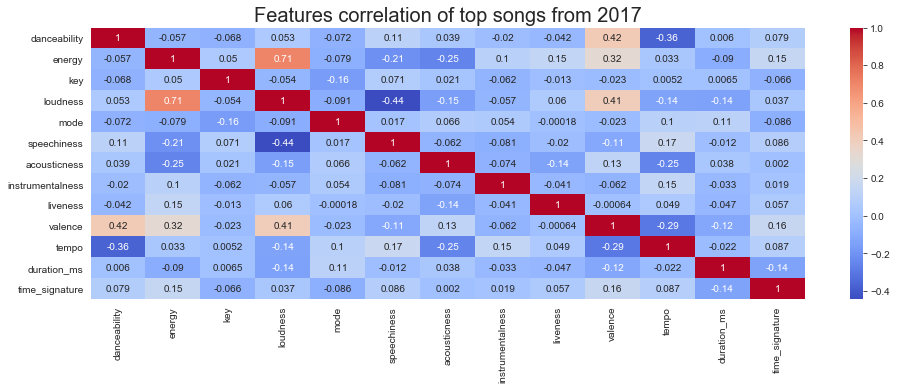

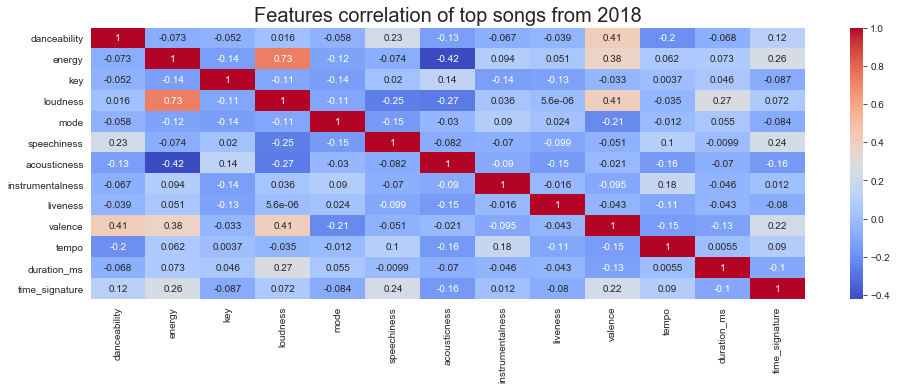

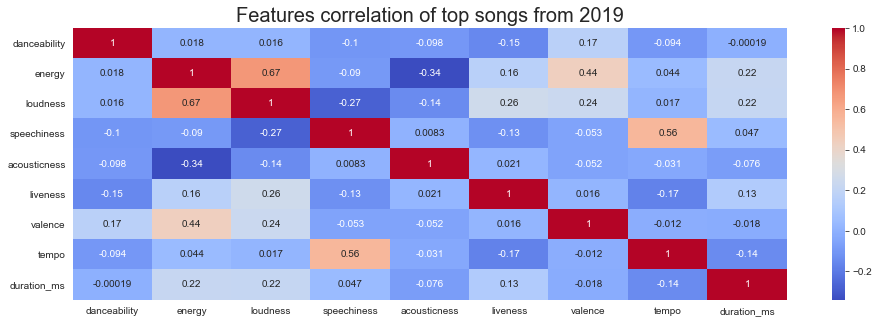

In [54]:
# prepare numerical values from top2017  
numeric = top2017[["danceability","energy","key", "loudness", "mode", "speechiness", 
                   "acousticness", "instrumentalness", "liveness","valence", "tempo",
                   "duration_ms","time_signature"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2017",
                                                                   fontsize=20)

# prepare numerical values from top2018
numeric2018 = top2018[["danceability","energy","key", "loudness", "mode", "speechiness", 
                       "acousticness", "instrumentalness", "liveness","valence", "tempo",
                       "duration_ms","time_signature"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric2018.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2018",
                                                                       fontsize=20)

# prepare numerical values from top2019 
numeric2019 = top2019[["danceability","energy", "loudness","speechiness", "acousticness",
                       "liveness", "valence", "tempo", "duration_ms"]]
plt.figure(figsize = (16,5))
sns.heatmap(numeric2019.corr(), cmap="coolwarm", annot=True).set_title("Features correlation of top songs from 2019",
                                                                       fontsize=20)

plt.show()

Most correlated features are energy and loudness, tempo and speechiness so as valence and energy. 

That means most popular songs depends from loudness and energy and speechiness depends from appropriate tempo. Valence and energy show us that value of energy make song soud happyer or sadder. 

In the next try to specifify this features to have difinition of main characteristics that make a song to be most popular. 

### Go thought all features and compare there distributions

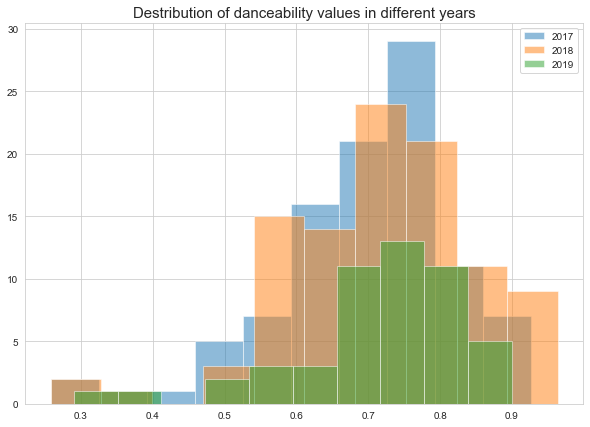

In [156]:
# Show distribution of danceability values
plt.figure(figsize=(10,7))
plt.hist(top2017.danceability, stacked=True, alpha=0.5, label = "2017")
plt.legend()
plt.hist(top2018.danceability, stacked=True, alpha=0.5, label = "2018")
plt.legend()
plt.hist(top2019.danceability, stacked=True, alpha=0.5, label = "2019")
plt.legend()

plt.title('Destribution of danceability values in different years', fontsize =15)
plt.show()

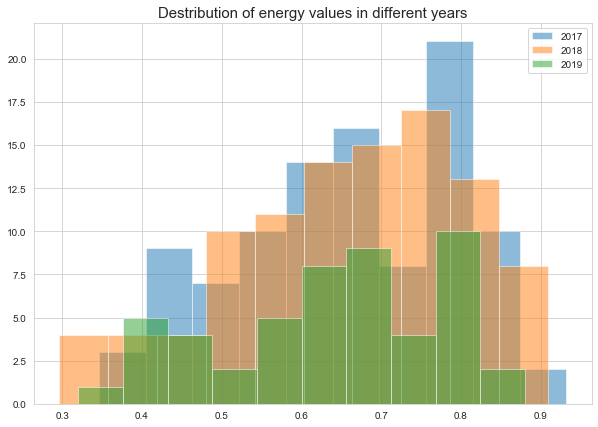

In [157]:
# Show distribution of energy values
plt.figure(figsize=(10,7))
plt.hist(top2017.energy, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.energy, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.energy, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of energy values in different years', fontsize =15)
plt.legend()
plt.show()

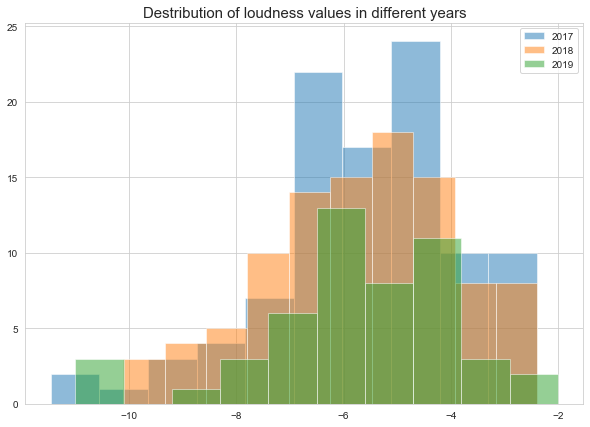

In [158]:
# Show distribution of loudness values
plt.figure(figsize=(10,7))
plt.hist(top2017.loudness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.loudness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.loudness, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of loudness values in different years', fontsize =15)
plt.legend()
plt.show()

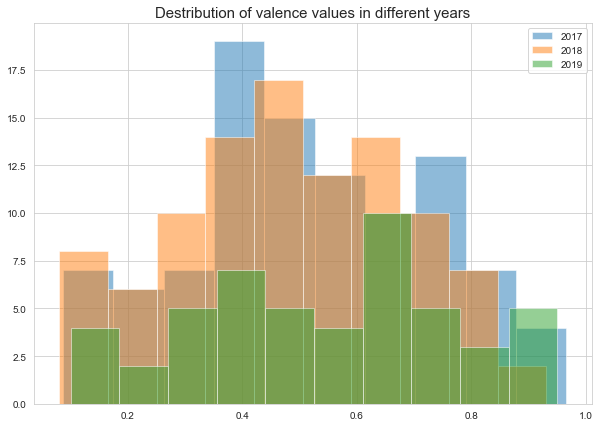

In [159]:
# Show distribution of valence values
plt.figure(figsize=(10,7))
plt.hist(top2017.valence, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.valence, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.valence, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of valence values in different years', fontsize =15)
plt.legend()
plt.show()

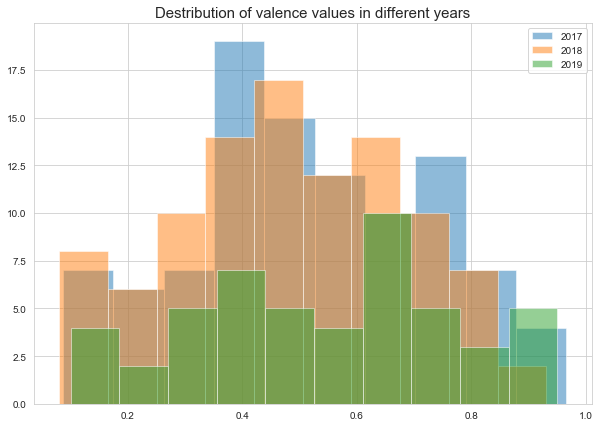

In [169]:
# Show distribution of valence values
plt.figure(figsize=(10,7))
plt.hist(top2017.valence, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.valence, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.valence, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of valence values in different years', fontsize =15)
plt.legend()
plt.show()

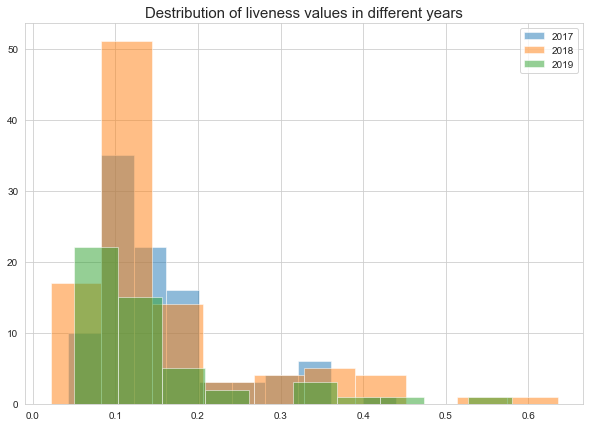

In [170]:
# Show distribution of liveness values
plt.figure(figsize=(10,7))
plt.hist(top2017.liveness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.liveness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.liveness, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of liveness values in different years', fontsize =15)
plt.legend()
plt.show()

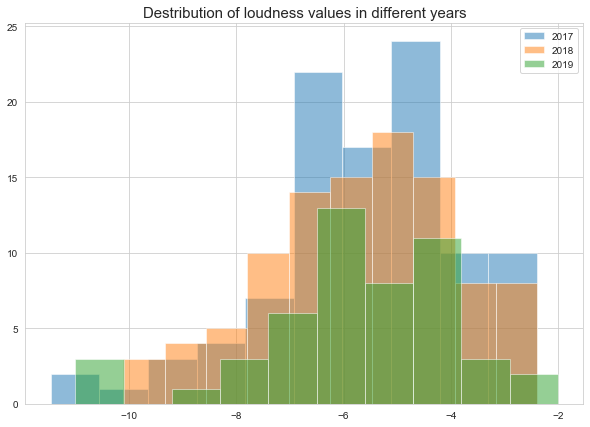

In [171]:
# Show distribution of loudness values
plt.figure(figsize=(10,7))
plt.hist(top2017.loudness, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.loudness, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.loudness, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of loudness values in different years', fontsize =15)
plt.legend()
plt.show()

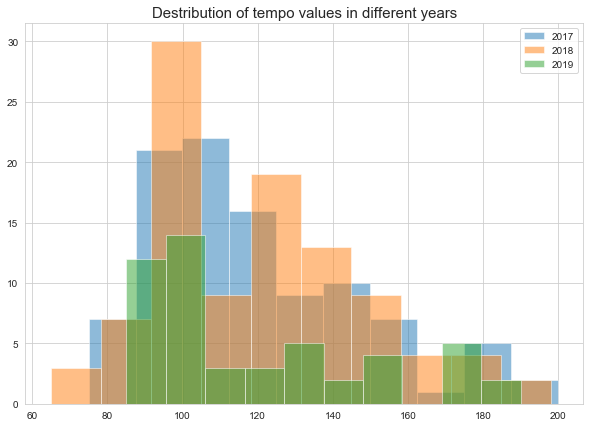

In [172]:
# Show distribution of tempo values
plt.figure(figsize=(10,7))
plt.hist(top2017.tempo, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.tempo, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.tempo, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of tempo values in different years', fontsize =15)
plt.legend()
plt.show()

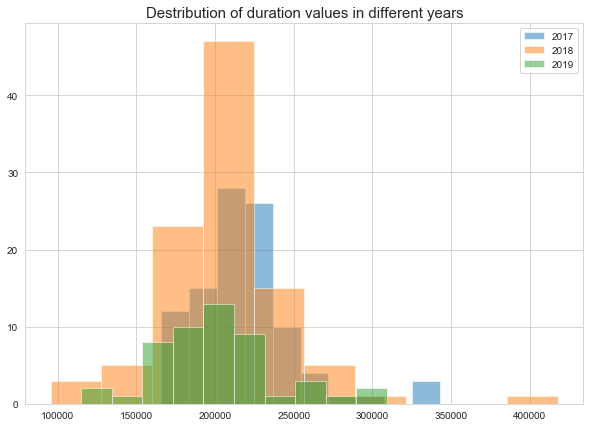

In [173]:
# Show distribution of duration values
plt.figure(figsize=(10,7))
plt.hist(top2017.duration_ms, stacked=True, alpha=0.5, label = "2017")
plt.hist(top2018.duration_ms, stacked=True, alpha=0.5, label = "2018")
plt.hist(top2019.duration_ms, stacked=True, alpha=0.5, label = "2019")
plt.title('Destribution of duration values in different years', fontsize =15)
plt.legend()
plt.show()